In [ ]:
!pip install pmdarima

In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas.plotting import register_matplotlib_converters


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 맑은 고딕 적용
matplotlib.rc('font', family = 'NanumGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus = False)

In [3]:
df = pd.read_csv("kurly.csv")
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [4]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,YearMonthStr
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12


In [5]:
# 신선식품, 가공식품 데이터프레임 생성
df_fresh = df[df['ItemLargeName']=='신선식품']
df_processed = df[df['ItemLargeName']=='가공식품']

In [6]:
# 월별 매출액 시계열 자료로 변환
df_fresh_time = df_fresh.groupby('YearMonthStr')['Price'].sum().reset_index()
df_processed_time = df_processed.groupby('YearMonthStr')['Price'].sum().reset_index()

In [9]:
# 날짜를 인덱스로
df_fresh_timeseries = df_fresh_time.set_index(keys='YearMonthStr')
df_processed_timeseries = df_processed_time.set_index(keys='YearMonthStr')

## 신선식품

In [10]:
# 신선식품 auto_arima
ts_model = auto_arima(df_fresh_timeseries, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1277.352, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1296.878, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1275.134, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1273.140, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1273.138, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1275.992, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1274.123, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1272.668, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1272.950, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=1276.570, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1275.083, Time=0.06 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.533 seconds


In [11]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(2)인 SARIMA 모델
ts_model_fresh = ARIMA(df_fresh_timeseries, order = (0, 2, 2), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_fresh = ts_model_fresh.fit()
print(ts_result_fresh.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   36
Model:             ARIMA(0, 2, 2)x(1, 1, [1], 12)   Log Likelihood                -390.036
Date:                            Wed, 20 Mar 2024   AIC                            790.073
Time:                                    02:32:52   BIC                            795.528
Sample:                                01-01-2021   HQIC                           791.358
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2074      0.477     -2.532      0.011      -2.142      -0.273
ma.L2          0.2553      0.489   

In [22]:
data = df_fresh_time.copy()

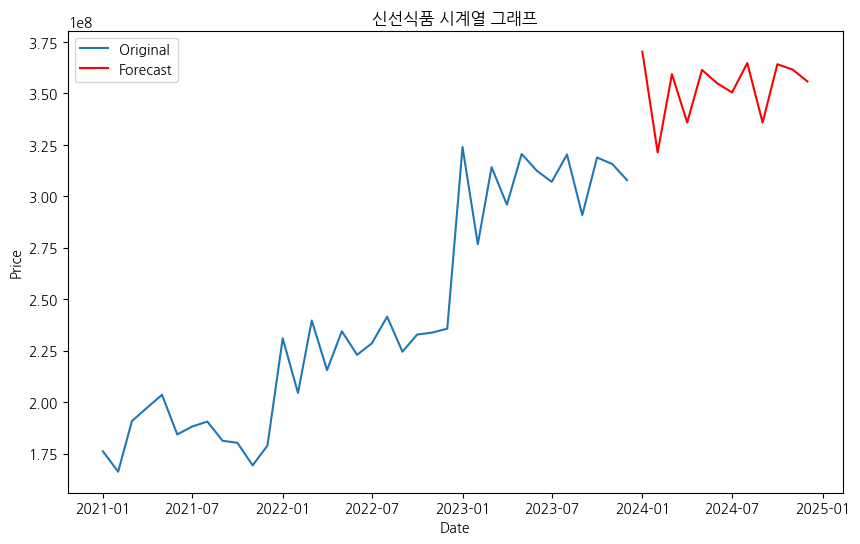

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data['YearMonthStr'] = pd.to_datetime(data['YearMonthStr'])
data.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('신선식품 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 가공식품

In [14]:
# 가공식품 auto_arima
ts_model = auto_arima(df_processed_timeseries, max_p=3, max_q=3, d=2, 
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1259.112, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1281.989, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1256.871, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1257.272, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1255.707, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1257.419, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1257.800, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1255.329, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1256.373, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1255.961, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1256.691, Time=0.03 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.430 seconds


In [15]:
# Train 데이터 이용, AR(1), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_processed = ARIMA(df_processed_timeseries, order = (1, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_processed = ts_model_processed.fit()
print(ts_result_processed.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -380.976
Date:                          Wed, 20 Mar 2024   AIC                            771.953
Time:                                  02:32:54   BIC                            777.408
Sample:                              01-01-2021   HQIC                           773.238
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6607      0.256     -2.584      0.010      -1.162      -0.160
ma.L1         -0.9193      0.049    -18.588      0.

In [19]:
data2 = df_processed_time.copy()

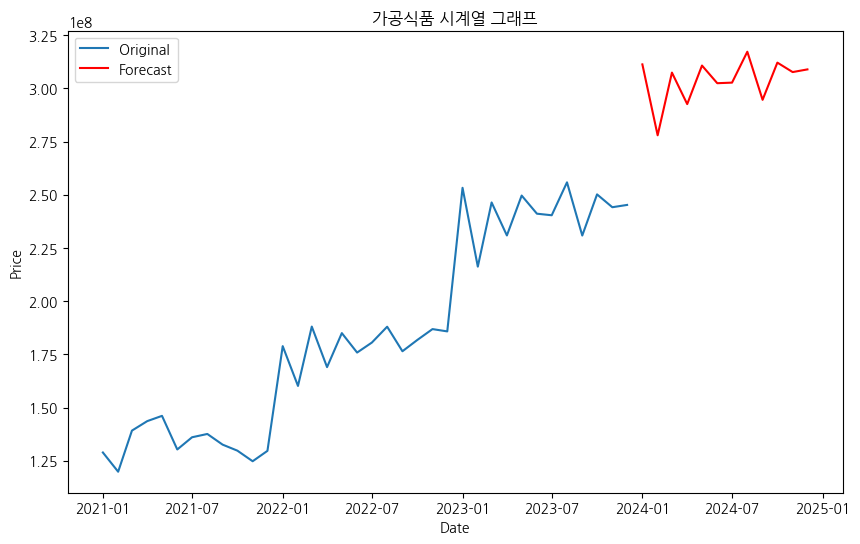

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data2['YearMonthStr'] = pd.to_datetime(data2['YearMonthStr'])
data2.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.

# 모델 학습
model = SARIMAX(data2['Price'], order=(1, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Price'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('가공식품 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
